# Solution 17-18
&emsp;&emsp;按照题目要求的方式生成样本容量为 20 的数据集，并在此数据集上运行一维 "decision stump" 算法，记录 Ein 并根据 Problem 16 中的公式计算相应的 Eout，重复实验 5000 次，求 Ein 和 Eout 的平均，并画出各自分布分直方图（简单起见就直接画了折线图）

In [1]:
from decisionStump import DecisionStump
import matplotlib.pyplot as plt
import numpy as np

ds = DecisionStump()

list_of_Ein = []
list_of_Eout = []
for i in range(5000):
    train_X, train_Y = ds.gen_data()
    Ein, s, theta = ds.train_1d(train_X, train_Y)
    Eout = ds.calc_Eout(s, theta)
    list_of_Ein.append(Ein)
    list_of_Eout.append(Eout)
    
print("the average Ein is {0}".format(np.mean(list_of_Ein)))
print("the average Eout is {0}".format(np.mean(list_of_Eout)))

the average Ein is 0.17125
the average Eout is 0.2399584267896481


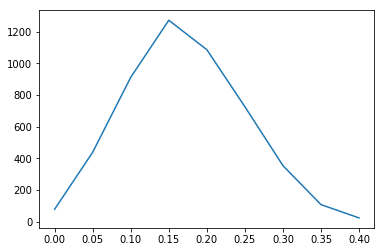

In [2]:
Ein_cnt = {}
for Ein in list_of_Ein:
    Ein_cnt.setdefault(Ein, 0)
    Ein_cnt[Ein] += 1

x = []
y = []
xy = [(k, Ein_cnt[k]) for k in sorted(Ein_cnt.keys())]
for item in xy:
    x.append(item[0])
    y.append(item[1])

plt.plot(x, y)
plt.show()

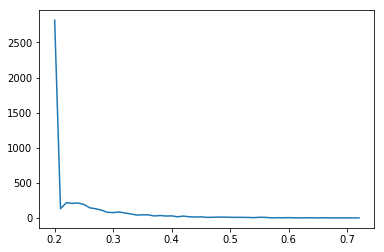

In [3]:
list_of_Eout = np.around(list_of_Eout, decimals=2)    # 保留 2 位小数
Eout_cnt = {}
for Eout in list_of_Eout:
    Eout_cnt.setdefault(Eout, 0)
    Eout_cnt[Eout] += 1
    
x = []
y = []
xy = [(k, Eout_cnt[k]) for k in sorted(Eout_cnt.keys())]
for item in xy:
    x.append(item[0])
    y.append(item[1])

plt.plot(x, y)
plt.show()

# Solution 19-20
&emsp;&emsp;对多维数据使用 "decision stump" 算法

In [4]:
train_X, train_Y = ds.read_file('hw2_train.dat.txt')
test_X, test_Y = ds.read_file('hw2_test.dat.txt')

In [9]:
ds.train(train_X, train_Y)
print("the optimal decision stump: i={0}, s={1}, theta={2}".format(ds.opt_i, ds.opt_s, ds.opt_theta))
print("the Ein of the optimal decision stump is: {0}".format(ds.opt_err))

the optimal decision stump: i=3, s=-1, theta=1.6175000000000002
the Ein of the optimal decision stump is: 0.25


In [8]:
Etest = ds.verify(test_X, test_Y)
print("the estimate of Eout by Etest is: {0}".format(Etest))

the estimate of Eout by Etest is: 0.355
